In [1]:
import csv
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

Reading in the cleaned DataFrame with added features.

In [3]:
cancer = pd.read_csv('cancer_ml5.csv', index_col=['Geography'])

In [4]:
cancer.shape

(3047, 323)

In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3047 entries, Abbeville County, South Carolina to Zavala County, Texas
Columns: 323 entries, avgAnnCount to PCT_LACCESS_HHNV10_sqrd
dtypes: bool(66), float64(167), int64(90)
memory usage: 6.2+ MB


In [6]:
cancer.head()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,PctSomeCol18_24_isnull,PctEmployed16_Over_isnull,PctPrivateCoverageAlone_isnull,age_gt_100,household_lt_1,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,PCT_LACCESS_POP10_isnull,PCT_LACCESS_LOWI10_isnull,PCT_LACCESS_CHILD10_isnull,PCT_LACCESS_SENIORS10_isnull,PCT_LACCESS_HHNV10_isnull,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,FOODINSEC_00_02_isnull,FOODINSEC_07_09_isnull,FOODINSEC_10_12_isnull,CH_FOODINSEC_02_12_isnull,CH_FOODINSEC_09_12_isnull,VLFOODSEC_00_02_isnull,VLFOODSEC_07_09_isnull,VLFOODSEC_10_12_isnull,CH_VLFOODSEC_02_12_isnull,CH_VLFOODSEC_09_12_isnull,FOODINSEC_CHILD_01_07_isnull,FOODINSEC_CHILD_03_11_isnull,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_LOCLFARM07_isnull,PCT_LOCLSALE07_isnull,PC_DIRSALES07_isnull,FMRKT09_isnull,FMRKT13_isnull,PCH_FMRKT_09_13_isnull,FMRKTPTH09_isnull,FMRKTPTH13_isnull,PCH_FMRKTPTH_09_13_isnull,PCT_FMRKT_SNAP13_isnull,PCT_FMRKT_WIC13_isnull,PCT_FMRKT_WICCASH13_isnull,PCT_FMRKT_SFMNP13_isnull,PCT_FRMKT_FRVEG13_isnull,PCT_FRMKT_ANMLPROD13_isnull,PCT_FMRKT_OTHER13_isnull,VEG_FARMS07_isnull,VEG_ACRES07_isnull,VEG_ACRESPTH07_isnull,FRESHVEG_FARMS07_isnull,FRESHVEG_ACRES07_isnull,FRESHVEG_ACRESPTH07_isnull,ORCHARD_FARMS07_isnull,ORCHARD_ACRES07_isnull,ORCHARD_AC

In [7]:
cancer.describe()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,povertyPercent_log,povertyPercent_sqrd,MedianAge_log,MedianAgeFemale_sqrd,AvgHouseholdSize_log,PercentMarried_log,PercentMarried_sqrd,PctSomeCol18_24_log,PctSomeCol18_24_sqrd,PctHS25_Over_sqrd,PctBachDeg25_Over_log,PctEmployed16_Over_log,PctEmployed16_Over_sqrd,PctPrivateCoverage_log,PctEmpPrivCoverage_log,PctPublicCoverage_log,PctPublicCoverageAlone_log,PctPublicCoverageAlone_sqrd,PctWhite_sqrd,PctBlack_sqrd,INTPTLONG_sqrd,mskcc_l1_log,mayo_l1_log,mayo_l1_sqrd,dfb_l1_log,dfb_l1_sqrd,cleveland_l1_log,cleveland_l1_sqrd,upmcps_l1_log,mgs_l1_log,atlanta_l1_log,denver_l1_sqrd,los_ang_l1_sqrd,seattle_l1_log,hopkins_l2_log,dfb_l2_log,cleveland_l2_log,upmcps_l2_log,mgs_l2_log,atlanta_l2_log,city_min_distsl1_sqrd,sc_min_dists_l1_log,PCT_LACCESS_CHILD10_sqrd,PCT_LACCESS_HHN

In [8]:
cancer.columns

Index(['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       ...
       'hopkins_l2_log', 'dfb_l2_log', 'cleveland_l2_log', 'upmcps_l2_log', 'mgs_l2_log', 'atlanta_l2_log', 'city_min_distsl1_sqrd', 'sc_min_dists_l1_log', 'PCT_LACCESS_CHILD10_sqrd', 'PCT_LACCESS_HHNV10_sqrd'], dtype='object', length=323)

Checking for duplicate rows in the DataFrame

In [9]:
cancer = cancer.drop_duplicates()
cancer.shape

(3047, 323)

Checking for variables with missing values, using both the .isnull().sum() and .isna().sum() chained methods.

A list of all the columns with missing values is called.

In [10]:
null_value_columns = list(cancer.columns[(cancer.isnull().sum()>0) | (cancer.isna().sum()>0)])
null_value_columns

[]

## Mining Logarithmic and Exponential Transformations of the Feature Set for Increased Accuracy

The next series of cells looks for extra information left in the feature set that the model won't be able utilize in a linear fashion to make a good fit. This can be done by looking for non-linear patterns in plots of the actual values of each individual feature and the actual target variable values, overlaid with plots of the actual values of each individual feature against the predicted target variable values. Additionally, a plot of the actual values of each individual feature and the residuals will be executed. Logarithmic and exponential versions of each feature will be investigated for their contribution to the predictive power of the model. 

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
lr = linear_model.LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y = cancer['TARGET_deathRate']

In [14]:
target_name = ['TARGET_deathRate']
X = cancer[[cn for cn in cancer.columns if cn not in target_name]]

In [15]:
X.columns

Index(['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       ...
       'hopkins_l2_log', 'dfb_l2_log', 'cleveland_l2_log', 'upmcps_l2_log', 'mgs_l2_log', 'atlanta_l2_log', 'city_min_distsl1_sqrd', 'sc_min_dists_l1_log', 'PCT_LACCESS_CHILD10_sqrd', 'PCT_LACCESS_HHNV10_sqrd'], dtype='object', length=322)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
lr.score(X_test, y_test)

0.6373532323363135

## 'FOODINSEC_00_02': Household food insecurity (%, three-year average), 2000-02

In [19]:
X['FOODINSEC_00_02_log'] = np.log(X['FOODINSEC_00_02'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lr.score(X_test, y_test)

0.635492628386247

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [23]:
X = X.drop(columns = 'FOODINSEC_00_02_log')

In [24]:
X['FOODINSEC_00_02_sqrd'] = X['FOODINSEC_00_02']**2

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lr.score(X_test, y_test)

0.6354791896628124

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [28]:
X = X.drop(columns = 'FOODINSEC_00_02_sqrd')

## 'FOODINSEC_07_09': Household food insecurity (%, three-year average), 2007-09

In [29]:
X['FOODINSEC_07_09_log'] = np.log(X['FOODINSEC_07_09'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lr.score(X_test, y_test)

0.6373251138089715

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [33]:
X = X.drop(columns = 'FOODINSEC_07_09_log')

In [34]:
X['FOODINSEC_07_09_sqrd'] = X['FOODINSEC_07_09']**2

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
lr.score(X_test, y_test)

0.6373458943954188

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [38]:
X = X.drop(columns = 'FOODINSEC_07_09_sqrd')

## 'FOODINSEC_10_12': Household food insecurity (%, three-year average), 2010-12

In [39]:
X['FOODINSEC_10_12_log'] = np.log(X['FOODINSEC_10_12'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
lr.score(X_test, y_test)

0.6373288749030597

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [43]:
X = X.drop(columns = 'FOODINSEC_10_12_log')

In [44]:
X['FOODINSEC_10_12_sqrd'] = X['FOODINSEC_10_12']**2

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
lr.score(X_test, y_test)

0.6372671488237556

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [48]:
X = X.drop(columns = 'FOODINSEC_10_12_sqrd')

## 'CH_FOODINSEC_02_12': Household food insecurity (change %), 2000-02 to 2010-12

There are zero values in 'CH_FOODINSEC_02_12', so a log version cannot be made.

In [49]:
X['CH_FOODINSEC_02_12_sqrd'] = X['CH_FOODINSEC_02_12']**2

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
lr.score(X_test, y_test)

0.6371697781174408

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [53]:
X = X.drop(columns = 'CH_FOODINSEC_02_12_sqrd')

## 'PCT_LOCLFARM07': Farms with direct sales (%), 2007

There are zero values in 'PCT_LOCLFARM07', so a log version cannot be created.

In [54]:
X['PCT_LOCLFARM07_sqrd'] = X['PCT_LOCLFARM07']**2

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
lr.score(X_test, y_test)

0.6334123507504408

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [58]:
X = X.drop(columns = 'PCT_LOCLFARM07_sqrd')

## 'PCT_LOCLSALE07': Direct farm sales (%), 2007

There are zero values in 'PCT_LOCLSALE07', so a log version cannot be created.

In [59]:
X['PCT_LOCLSALE07_sqrd'] = X['PCT_LOCLSALE07']**2

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
lr.score(X_test, y_test)

0.6338588670570644

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [63]:
X = X.drop(columns = 'PCT_LOCLSALE07_sqrd')

## 'PC_DIRSALES07': Direct farm sales per capita, 2007

There are zero values in 'PC_DIRSALE07', so a log version cannot be created.

In [64]:
X['PC_DIRSALES07_sqrd'] = X['PC_DIRSALES07']**2

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
lr.score(X_test, y_test)

0.6374476024813625

The squared version resulted in an increase in accuracy, so it is added to the core feature set.

In [68]:
cancer['PC_DIRSALES07_sqrd'] = cancer['PC_DIRSALES07']**2

In [69]:
X88 = np.array(cancer['PC_DIRSALES07'])
X88 = X88.reshape(-1, 1)

In [70]:
lr.fit(X88, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
lr.score(X88, y)

0.012102830994781044

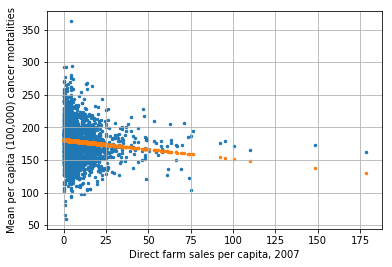

In [72]:
plt.scatter(X88, y, s=6)
plt.scatter(X88, lr.predict(X88), s=6)
plt.grid()
plt.xlabel("Direct farm sales per capita, 2007", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PC_DIRSALES07_actual_&_predicted_Y.png')

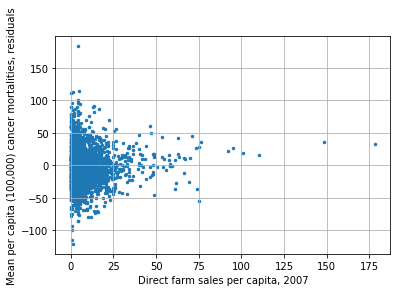

In [73]:
plt.scatter(X88, y - lr.predict(X88), s=6)
plt.grid()
plt.xlabel("Direct farm sales per capita, 2007", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PC_DIRSALES07_residuals.png')

In [74]:
X88.shape

(3047, 1)

In [75]:
dfx88 = pd.DataFrame(X88)
dfx88.head()

,0
0,3.73
1,7.68
2,1.72
3,2.29
4,6.95


In [76]:
dfx88['PC_DIRSALES07'] = X88**2

In [77]:
dfx88.head()

,0,PC_DIRSALES07
0,3.73,13.9129
1,7.68,58.9824
2,1.72,2.9584
3,2.29,5.2441
4,6.95,48.3025


In [78]:
lr.fit(dfx88, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
lr.score(dfx88, y)

0.01622735402782538

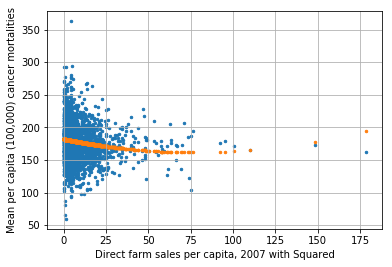

In [80]:
plt.scatter(X88, y, s=6) 
plt.scatter(X88, lr.predict(dfx88), s=6)
plt.grid()
plt.xlabel("Direct farm sales per capita, 2007 with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PC_DIRSALES07_sqrd_actual_&_predicted_Y.png')

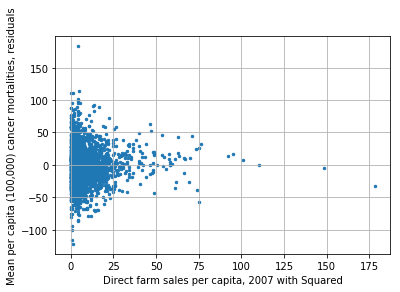

In [81]:
plt.scatter(X88, y - lr.predict(dfx88), s=6)
plt.grid()
plt.xlabel("Direct farm sales per capita, 2007 with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PC_DIRSALES07_sqrd_residuals.png')

## 'FMRKT09': Farmers' markets, 2009

There are zero values in 'FMRKT09', so a log version cannot be created.

In [82]:
X['FMRKT09_sqrd'] = X['FMRKT09']**2

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
lr.score(X_test, y_test)

0.6378373335371704

The squared version resulted in an increase in accuracy, so it is added to the core feature set.

In [86]:
cancer['FMRKT09_sqrd'] = cancer['FMRKT09']**2

In [87]:
X89 = np.array(cancer['FMRKT09'])
X89 = X89.reshape(-1, 1)

In [88]:
lr.fit(X89, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
lr.score(X89, y)

0.019536251503185942

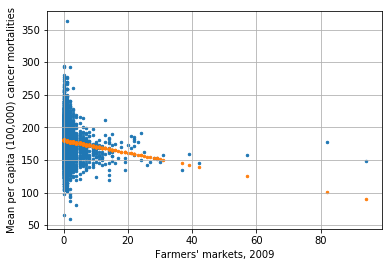

In [90]:
plt.scatter(X89, y, s=6)
plt.scatter(X89, lr.predict(X89), s=6)
plt.grid()
plt.xlabel("Farmers' markets, 2009", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('FMRKT09_actual_&_predicted_Y.png')

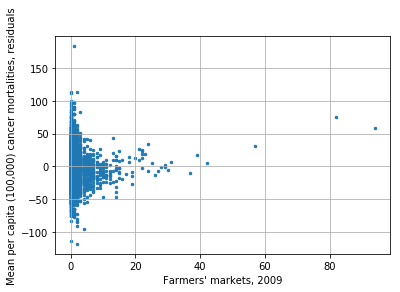

In [91]:
plt.scatter(X89, y - lr.predict(X89), s=6)
plt.grid()
plt.xlabel("Farmers' markets, 2009", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('FMRKT09_residuals.png')

In [92]:
X89.shape

(3047, 1)

In [93]:
dfx89 = pd.DataFrame(X89)
dfx89.head()

,0
0,2
1,0
2,1
3,9
4,2


In [94]:
dfx89['FMRKT09_sqrd'] = X89**2

In [95]:
dfx89.head()

,0,FMRKT09_sqrd
0,2,4
1,0,0
2,1,1
3,9,81
4,2,4


In [96]:
lr.fit(dfx89, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
lr.score(dfx89, y)

0.028406703658694354

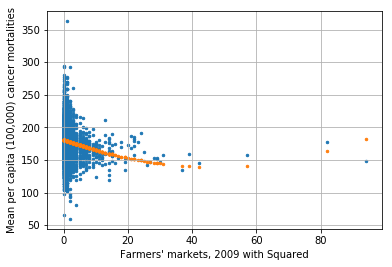

In [98]:
plt.scatter(X89, y, s=6) 
plt.scatter(X89, lr.predict(dfx89), s=6)
plt.grid()
plt.xlabel("Farmers' markets, 2009 with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('FMRKT09_sqrd_actual_&_predicted_Y.png')

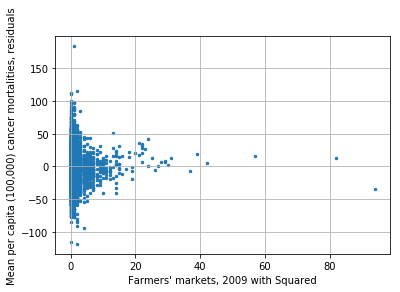

In [99]:
plt.scatter(X89, y - lr.predict(dfx89), s=6)
plt.grid()
plt.xlabel("Farmers' markets, 2009 with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('FMRKT09_sqrd_residuals.png')

## 'PCT_FRMKT_FRVEG13': Farmers' markets that report selling fruit & vegetables (%), 2013

There are zero values in 'PCT_FRMKT_FRVEG13', so a log version cannot be created.

In [100]:
X['PCT_FRMKT_FRVEG13_sqrd'] = X['PCT_FRMKT_FRVEG13']**2

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
lr.score(X_test, y_test)

0.6378986437396718

The squared version resulted in an increase in accuracy, so it is added to the core feature set.

In [104]:
cancer['PCT_FRMKT_FRVEG13_sqrd'] = cancer['PCT_FRMKT_FRVEG13']**2

In [105]:
X90 = np.array(cancer['PCT_FRMKT_FRVEG13'])
X90 = X90.reshape(-1, 1)

In [106]:
lr.fit(X90, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [107]:
lr.score(X90, y)

0.00023012627396234997

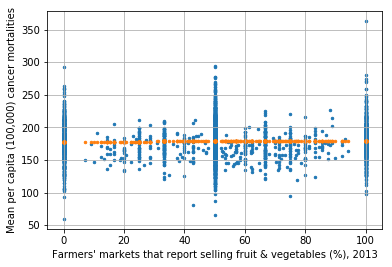

In [108]:
plt.scatter(X90, y, s=6)
plt.scatter(X90, lr.predict(X90), s=6)
plt.grid()
plt.xlabel("Farmers' markets that report selling fruit & vegetables (%), 2013", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PCT_FRMKT_FRVEG13_actual_&_predicted_Y.png')

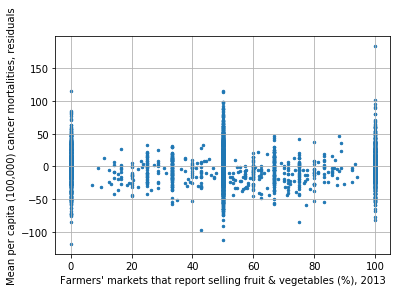

In [109]:
plt.scatter(X90, y - lr.predict(X90), s=6)
plt.grid()
plt.xlabel("Farmers' markets that report selling fruit & vegetables (%), 2013", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PCT_FRMKT_FRVEG13_residuals.png')

In [110]:
X90.shape

(3047, 1)

In [111]:
dfx90 = pd.DataFrame(X90)
dfx90.head()

,0
0,50.0
1,50.0
2,100.0
3,80.0
4,0.0


In [112]:
dfx90['PCT_FRMKT_FRVEG13_sqrd'] = X90**2

In [113]:
dfx90.head()

,0,PCT_FRMKT_FRVEG13_sqrd
0,50.0,2500.0
1,50.0,2500.0
2,100.0,10000.0
3,80.0,6400.0
4,0.0,0.0


In [114]:
lr.fit(dfx90, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
lr.score(dfx90, y)

0.0016726617588771475

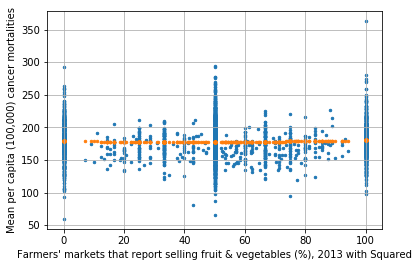

In [116]:
plt.scatter(X90, y, s=6) 
plt.scatter(X90, lr.predict(dfx90), s=6)
plt.grid()
plt.xlabel("Farmers' markets that report selling fruit & vegetables (%), 2013 with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PCT_FRMKT_FRVEG13_sqrd_actual_&_predicted_Y.png')

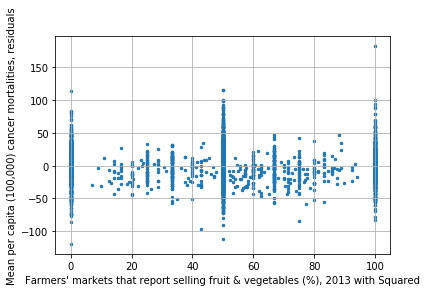

In [117]:
plt.scatter(X90, y - lr.predict(dfx90), s=6)
plt.grid()
plt.xlabel("Farmers' markets that report selling fruit & vegetables (%), 2013 with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PCT_FRMKT_FRVEG13_sqrd_residuals.png')

## 'PCT_DIABETES_ADULTS09': Adult diabetes rate, 2009

In [118]:
X['PCT_DIABETES_ADULTS09_log'] = np.log(X['PCT_DIABETES_ADULTS09'])

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
lr.score(X_test, y_test)

0.6354150278839223

In [122]:
X = X.drop(columns = 'PCT_DIABETES_ADULTS09_log')

In [123]:
X['PCT_DIABETES_ADULTS09_sqrd'] = X['PCT_DIABETES_ADULTS09']**2

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [126]:
lr.score(X_test, y_test)

0.6351942975430379

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [127]:
X = X.drop(columns = 'PCT_DIABETES_ADULTS09_sqrd')

## 'PCT_OBESE_ADULTS13': Adult obesity rate, 2013

In [128]:
X['PCT_OBESE_ADULTS13_log'] = np.log(X['PCT_OBESE_ADULTS13'])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
lr.score(X_test, y_test)

0.6378986818172798

The log version resulted in an increase in accuracy, so it is added to the core feature set.

In [132]:
cancer['PCT_OBESE_ADULTS13_log'] = np.log(cancer['PCT_OBESE_ADULTS13'])

In [133]:
X['PCT_OBESE_ADULTS13_sqrd'] = X['PCT_OBESE_ADULTS13']**2

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [136]:
lr.score(X_test, y_test)

0.6379030148270405

The squared version resulted in an increase in accuracy, so it is added to the core feature set.

In [137]:
cancer['PCT_OBESE_ADULTS13_sqrd'] = cancer['PCT_OBESE_ADULTS13']**2

In [138]:
X92 = np.array(cancer['PCT_OBESE_ADULTS13'])
X92 = X92.reshape(-1, 1)

In [139]:
lr.fit(X92, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [140]:
lr.score(X92, y)

0.18409719875879949

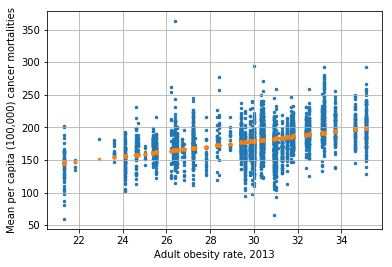

In [141]:
plt.scatter(X92, y, s=6)
plt.scatter(X92, lr.predict(X92), s=6)
plt.grid()
plt.xlabel("Adult obesity rate, 2013", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PCT_OBESE_ADULTS13_actual_&_predicted_Y.png')

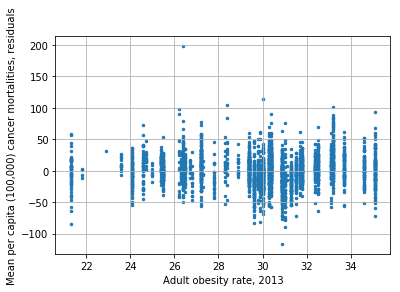

In [142]:
plt.scatter(X92, y - lr.predict(X92), s=6)
plt.grid()
plt.xlabel("Adult obesity rate, 2013", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PCT_OBESE_ADULTS13_residuals.png')

In [143]:
X92.shape

(3047, 1)

In [144]:
dfx92 = pd.DataFrame(X92)
dfx92.head()

,0
0,31.7
1,33.1
2,27.2
3,29.6
4,31.3


In [145]:
dfx92['PCT_OBESE_ADULTS13_log'] = np.log(X92)

In [146]:
dfx92.head()

,0,PCT_OBESE_ADULTS13_log
0,31.7,3.456317
1,33.1,3.499533
2,27.2,3.303217
3,29.6,3.387774
4,31.3,3.443618


In [147]:
lr.fit(dfx92, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
lr.score(dfx92, y)

0.18810717825261536

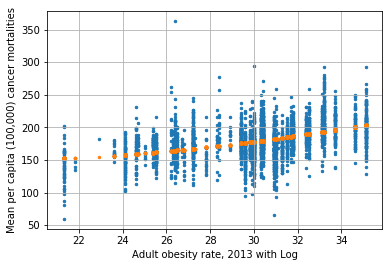

In [149]:
plt.scatter(X92, y, s=6) 
plt.scatter(X92, lr.predict(dfx92), s=6)
plt.grid()
plt.xlabel("Adult obesity rate, 2013 with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PCT_OBESE_ADULTS13_log_actual_&_predicted_Y.png')

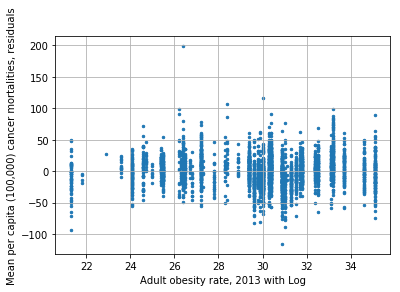

In [150]:
plt.scatter(X92, y - lr.predict(dfx92), s=6)
plt.grid()
plt.xlabel("Adult obesity rate, 2013 with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PCT_OBESE_ADULTS13_log_residuals.png')

In [151]:
dfx92['PCT_OBESE_ADULTS13_sqrd'] = X92**2

In [152]:
dfx92.head()

,0,PCT_OBESE_ADULTS13_log,PCT_OBESE_ADULTS13_sqrd
0,31.7,3.456317,1004.89
1,33.1,3.499533,1095.61
2,27.2,3.303217,739.84
3,29.6,3.387774,876.16
4,31.3,3.443618,979.69


In [153]:
lr.fit(dfx92, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
lr.score(dfx92, y)

0.20006240273947928

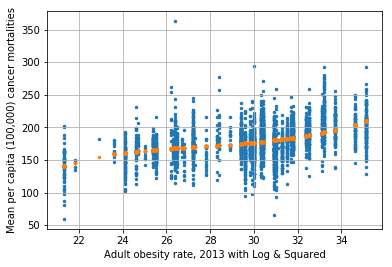

In [155]:
plt.scatter(X92, y, s=6) 
plt.scatter(X92, lr.predict(dfx92), s=6)
plt.grid()
plt.xlabel("Adult obesity rate, 2013 with Log & Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PCT_OBESE_ADULTS13_log_sqrd_actual_&_predicted_Y.png')

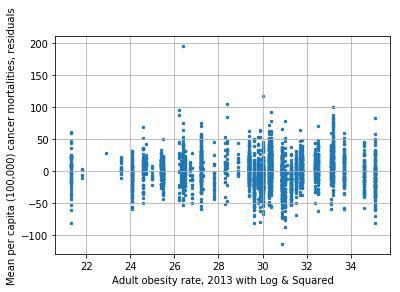

In [156]:
plt.scatter(X92, y - lr.predict(dfx92), s=6)
plt.grid()
plt.xlabel("Adult obesity rate, 2013 with Log & Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PCT_OBESE_ADULTS13_log_sqrd_residuals.png')

## 'RECFAC12': Recreation & fitness facilities, 2012

There are zero values in 'RECFAC12', so a log version isn't possible.

In [157]:
X['RECFAC12_sqrd'] = X['RECFAC12']**2

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [160]:
lr.score(X_test, y_test)

0.6378876282823704

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [161]:
X = X.drop(columns = 'RECFAC12_sqrd')

## 'NATAMEN': ERS natural amenity index, 1999

In [162]:
X['NATAMEN_log'] = np.log(X['NATAMEN'])

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [165]:
lr.score(X_test, y_test)

0.6358521405047006

In [166]:
X = X.drop(columns = 'NATAMEN_log')

In [167]:
X['NATAMEN_sqrd'] = X['NATAMEN']**2

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [170]:
lr.score(X_test, y_test)

0.6371636803116392

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [171]:
X = X.drop(columns = 'NATAMEN_sqrd')

## 'CHILDPOVRATE10': Child poverty rate, 2010

In [172]:
X['CHILDPOVRATE10_log'] = np.log(X['CHILDPOVRATE10'])

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [175]:
lr.score(X_test, y_test)

0.6406632600876097

There is a significant increase in model accuracy, so the log version is added to the core feature set.

In [176]:
cancer['CHILDPOVRATE10_log'] = np.log(cancer['CHILDPOVRATE10'])

In [177]:
X['CHILDPOVRATE10_sqrd'] = X['CHILDPOVRATE10']**2

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [180]:
lr.score(X_test, y_test)

0.6403628705777575

The squared version resulted in a loss of accuracy, so it is dropped from the feature set.

In [181]:
X = X.drop(columns = 'CHILDPOVRATE10_sqrd')

In [183]:
X95 = np.array(cancer['CHILDPOVRATE10'])
X95 = X95.reshape(-1, 1)

In [184]:
lr.fit(X95, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [185]:
lr.score(X95, y)

0.1983384497414301

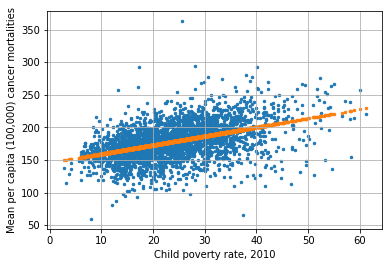

In [186]:
plt.scatter(X95, y, s=6)
plt.scatter(X95, lr.predict(X95), s=6)
plt.grid()
plt.xlabel("Child poverty rate, 2010", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('CHILDPOVRATE10_actual_&_predicted_Y.png')

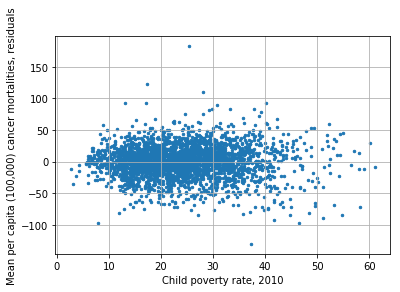

In [187]:
plt.scatter(X95, y - lr.predict(X95), s=6)
plt.grid()
plt.xlabel("Child poverty rate, 2010", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('CHILDPOVRATE10_residuals.png')

In [188]:
X95.shape

(3047, 1)

In [189]:
dfx95 = pd.DataFrame(X95)
dfx95.head()

,0
0,26.6
1,29.6
2,28.7
3,16.1
4,14.1


In [190]:
dfx95['CHILDPOVRATE10_log'] = np.log(X95)

In [191]:
dfx95.head()

,0,CHILDPOVRATE10_log
0,26.6,3.280911
1,29.6,3.387774
2,28.7,3.356897
3,16.1,2.778819
4,14.1,2.646175


In [192]:
lr.fit(dfx95, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [193]:
lr.score(dfx95, y)

0.19966510454171127

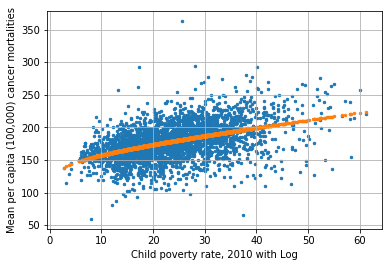

In [194]:
plt.scatter(X95, y, s=6) 
plt.scatter(X95, lr.predict(dfx95), s=6)
plt.grid()
plt.xlabel("Child poverty rate, 2010 with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('CHILDPOVRATE10_log_actual_&_predicted_Y.png')

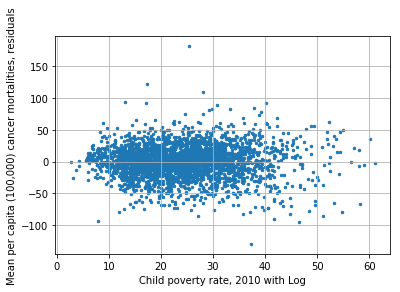

In [195]:
plt.scatter(X95, y - lr.predict(dfx95), s=6)
plt.grid()
plt.xlabel("Child poverty rate, 2010 with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('CHILDPOVRATE10_residuals.png')

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [198]:
lr.score(X_test, y_test)

0.6406632600876097

In [199]:
cancer.to_csv('cancer_ml6.csv')